# Accrual (IDI and ISE)

### Marcos Costa Santos Carreira - Jun 2017

## Importing Packages and setup

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the time series

In [4]:
path = '/Users/marcoscscarreira/Documents/XP2017/'
filename = 'STI-20170531113332729.csv'

In [5]:
BCBTSf=pd.read_table(path+filename, sep=";")
BCBTS=BCBTSf.copy().iloc[:-1]
BCBTS.columns=['Date','SETA','SELIC','CDI']
BCBTS['Date'] = pd.to_datetime(BCBTS['Date'].values, dayfirst=True)
BCBTS=BCBTS.replace("-",np.nan)
BCBTS.set_index(['Date'],inplace=True)
BCBTS['SETA']=BCBTS['SETA'].apply(np.float)
BCBTS['SELIC']=BCBTS['SELIC'].apply(np.float)
BCBTS['CDI']=BCBTS['CDI'].apply(np.float)
BCBTS.dropna(inplace=True)

In [15]:
filename2 = 'IDIISEv.xlsx'
IDI3 = pd.ExcelFile(path+filename2).parse('IDIX3')
IDI3.set_index('Date',inplace=True)
IDI3.columns=['IDI3']
IDI9 = pd.ExcelFile(path+filename2).parse('IDIX9')
IDI9.set_index('Date',inplace=True)
IDI9.columns=['IDI9']
ISE = pd.ExcelFile(path+filename2).parse('BZSXISE')
ISE.set_index('Date',inplace=True)
ISE.columns=['ISE']

In [18]:
dfacc=pd.concat([IDI3,IDI9,ISE],axis=1)

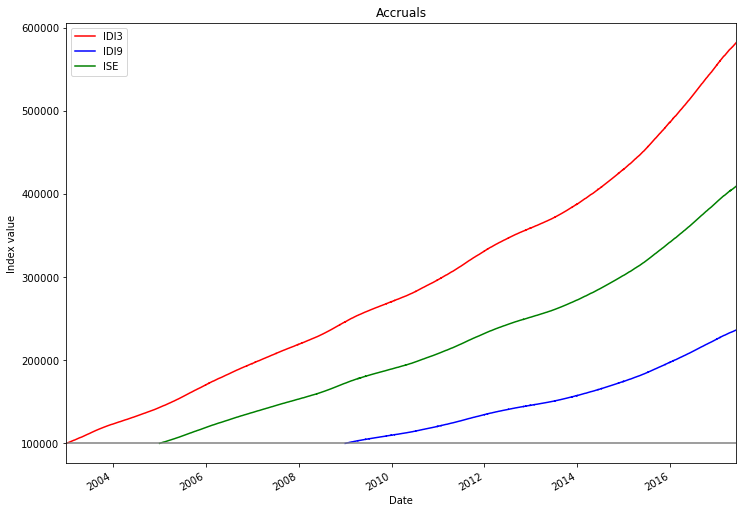

In [89]:
dfacc.plot(figsize=(12,9),title='Accruals',color=['red','blue','green']);
plt.axhline(100000,color='gray');
plt.ylabel('Index value');

In [60]:
p0=IDI9.loc['2017-04-13':]

In [91]:
p0.tail()

,IDI9
Date,
2017-05-26,235931.09
2017-05-29,236029.91
2017-05-30,236128.80
2017-05-31,236227.70
2017-06-01,236326.61


In [61]:
p0a=p0[p0['IDI9']!=p0['IDI9'].shift()]

In [70]:
r0=(((p0a/p0a.shift())**252-1)*100)

In [71]:
r1=r0+0.25
r2=r0+0.50
r3=r0-0.25
r4=r0-0.50

In [78]:
p1=p0.iloc[0]*(((1+r1/100)**(1/252)).fillna(1)).cumprod()
p2=p0.iloc[0]*(((1+r2/100)**(1/252)).fillna(1)).cumprod()
p3=p0.iloc[0]*(((1+r3/100)**(1/252)).fillna(1)).cumprod()
p4=p0.iloc[0]*(((1+r4/100)**(1/252)).fillna(1)).cumprod()

In [84]:
dfIDIs=pd.concat([p0a,p1,p2,p3,p4],axis=1)

In [86]:
dfIDIs.columns=['-100bp','-75bp','-50bp','-125bp','-150bp']

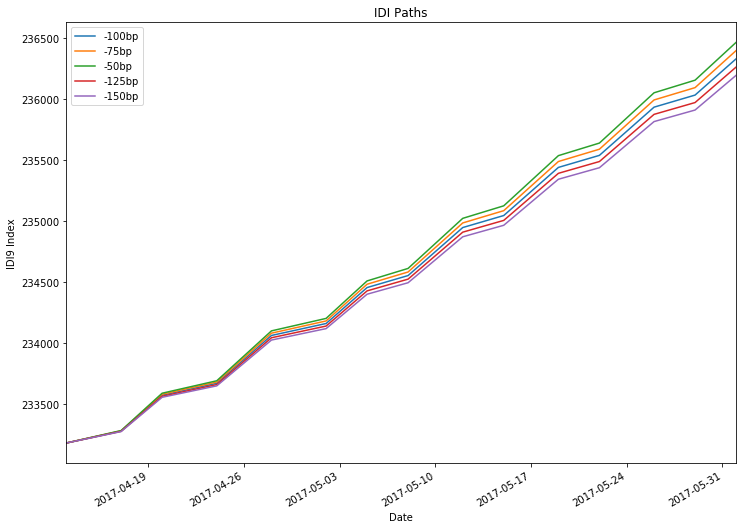

In [90]:
dfIDIs.plot(figsize=(12,9),title='IDI Paths');
plt.ylabel('IDI9 Index');

In [97]:
dfIDIs.loc['2017-06-01']

-100bp    236326.610000
-75bp     236394.054226
-50bp     236461.366421
-125bp    236259.033186
-150bp    236191.323225
Name: 2017-06-01 00:00:00, dtype: float64

In [109]:
d2b=np.arange(236100-5,236600+5,10)

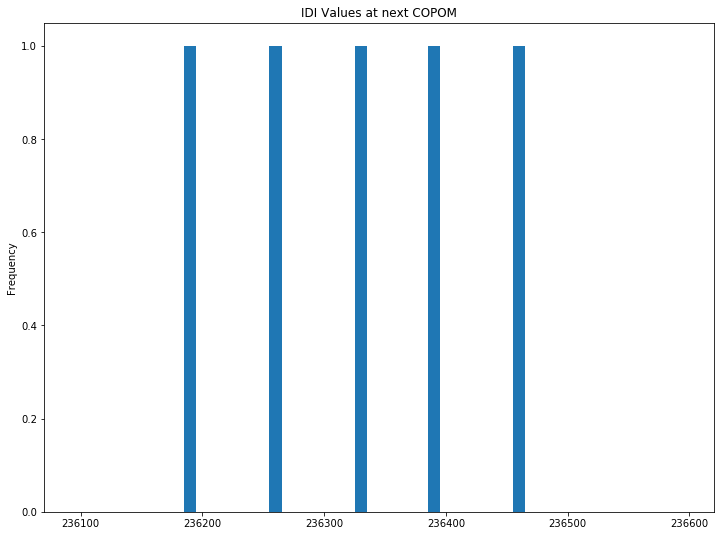

In [110]:
dfIDIs.loc['2017-06-01'].plot.hist(figsize=(12,9),title='IDI Values at next COPOM',bins=d2b);